In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')


## Reading the datset

In [29]:
df = pd.read_csv('Dataset/train_ctrUa4K.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Basic understanding

In [30]:
df.shape

(614, 13)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [32]:
df['Loan_ID'].nunique()

614

In [33]:
# All the entries in loan id are unique. So it cannot be used for analysis. Load ID can dropped

In [34]:
df.drop(columns='Loan_ID',inplace=True)

In [10]:
print(df['Gender'].nunique())
print(df['Gender'].unique())

2
['Male' 'Female' nan]


In [11]:
# Gender has male and female.
# The have null values

In [12]:
print(df['Married'].nunique())
print(df['Married'].unique())

2
['No' 'Yes' nan]


In [13]:
# Gender has yes and no.
# The have null values

In [14]:
print(df['Dependents'].nunique())
print(df['Dependents'].unique())

4
['0' '1' '2' '3+' nan]


In [ ]:
# Dependents have 0,1,2,3+.
# The have null values

In [15]:
print(df['Education'].nunique())
print(df['Education'].unique())

2
['Graduate' 'Not Graduate']


In [ ]:
# Education have graduate and non graduate
# The have no null values

In [16]:
print(df['Self_Employed'].nunique())
print(df['Self_Employed'].unique())

2
['No' 'Yes' nan]


In [18]:
print(df['Loan_Amount_Term'].nunique())
print(df['Loan_Amount_Term'].unique())

10
[360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]


In [19]:
print(df['Credit_History'].nunique())
print(df['Credit_History'].unique())

2
[ 1.  0. nan]


In [20]:
print(df['Property_Area'].nunique())
print(df['Property_Area'].unique())

3
['Urban' 'Rural' 'Semiurban']


In [21]:
print(df['Loan_Status'].nunique())
print(df['Loan_Status'].unique())

2
['Y' 'N']


In [22]:
df['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [23]:
df['CoapplicantIncome'].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [ ]:
# Since min value in Co applicant income is 0.Some of the loan, there is no second income

In [24]:
df['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [25]:
# There is no data formatting issue in our dataset.

# Univariate analysis

In [35]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [37]:
con_col = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
cat_col = list(set(df.columns)-set(con_col))

#### Univariate Analysis -  Continous column

In [38]:
con_col

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

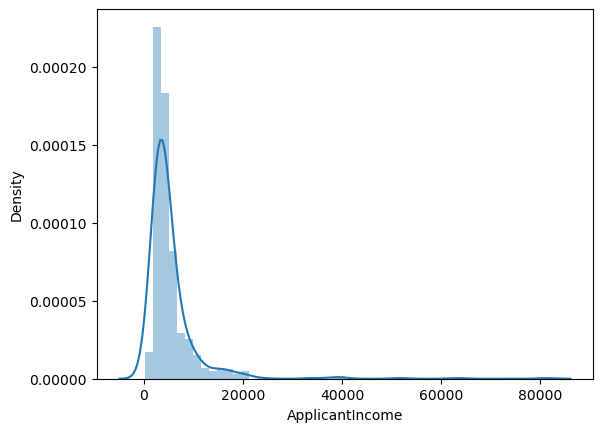

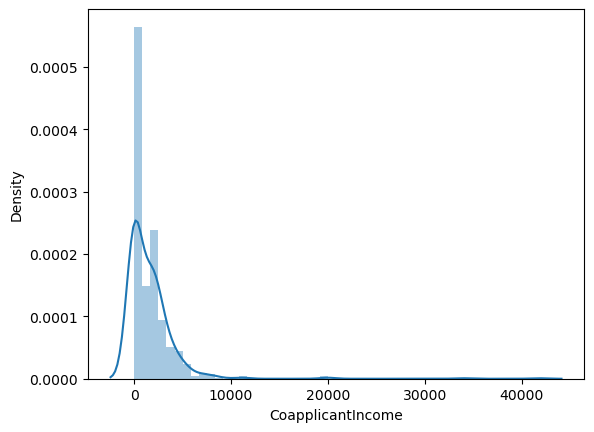

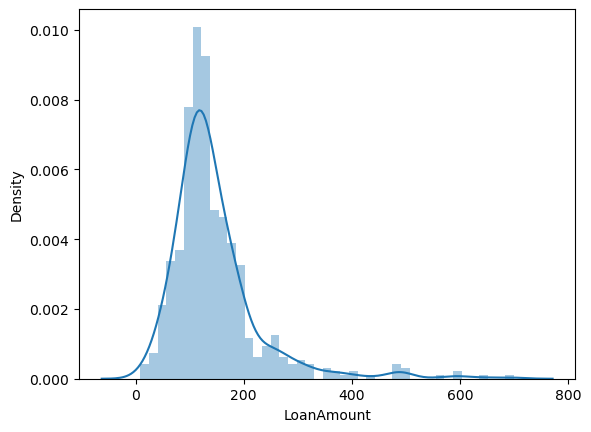

In [39]:
# 3 seperate graphs

for col in con_col:
    sns.distplot(df[col])
    plt.show()

In [40]:
# Subplots

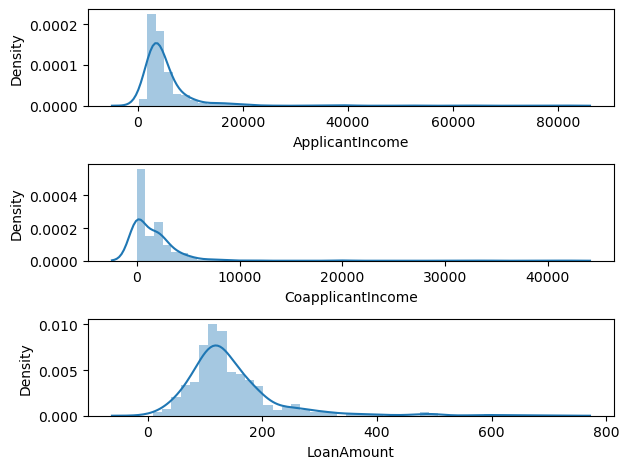

In [43]:
row =3
col= 1
k = 1
for c in con_col:
    plt.subplot(row,col,k)
    sns.distplot(df[c])
    k=k+1
plt.tight_layout()
plt.show()

In [ ]:
# Inference 

# 1) Application Income and Copplication Income are rightskewed
# 2) Loan Amount is close to normal distribtuion

In [47]:
print(df['ApplicantIncome'].skew())  
print(df['CoapplicantIncome'].skew())
print(df['LoanAmount'].skew())

6.539513113994625
7.491531216657306
2.677551679256059


In [48]:
# Heavy right skewed distributioj in Applicant and Copplicant Income
# Moderate skewness in Loan Amount

In [ ]:
# If the ML model is not performing well, then transforming skew data may improve the performance

# log
# sqrt
# boxcox

#### Univariate Analysis -  Categorical column

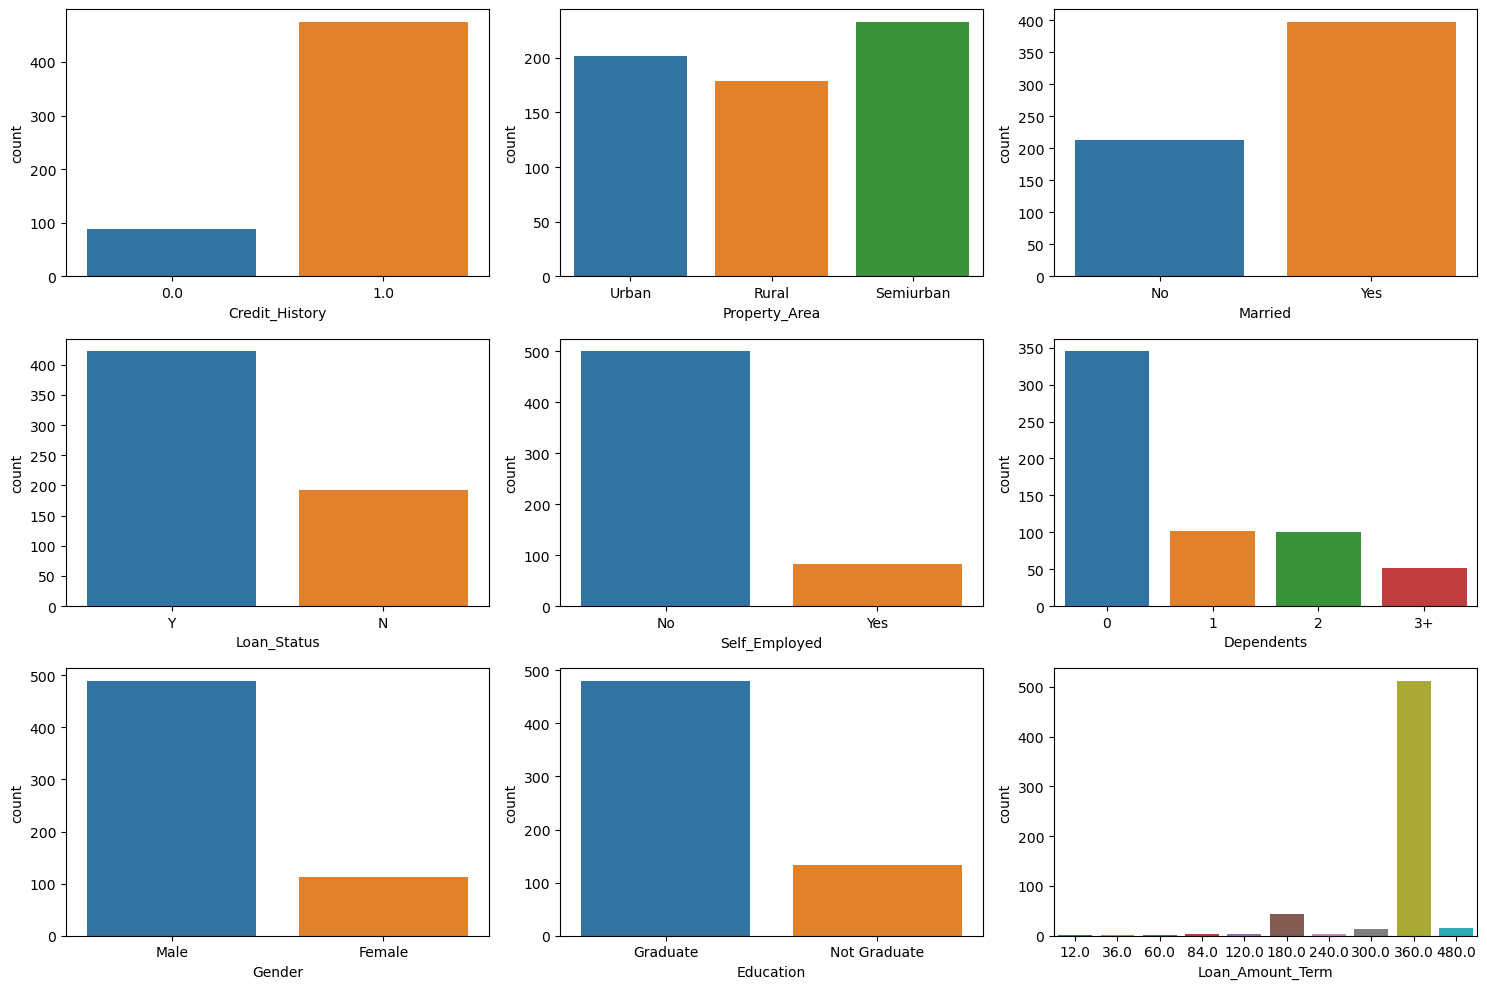

In [51]:
row =3
col= 3
k = 1
plt.figure(figsize=(15,10))
for c in cat_col:
    plt.subplot(row,col,k)
    sns.countplot(df[c])
    k=k+1
plt.tight_layout()
plt.show()

In [ ]:
#  Credit history is good more number of people
#  Count of urban and rural are closer . Semiurban is higher than urban and rural
#  More Loan Applicants are married
#  Most of the loans are approved
#  Most of applicants are not selfemployed
#  Most of the have no dependents
#  Most of the loan applicants are male
#  Most of the loan applicants are graduates
#  Most of the loan loan term are 360 and 180 months

In [52]:
df['Credit_History'].value_counts(normalize=True)

1.0    0.842199
0.0    0.157801
Name: Credit_History, dtype: float64

In [ ]:
# 84.2% of the people have good credit history

In [53]:
df['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [54]:
# 68.7% of applied loans are approved

# Bivariate Analysis

## Other Features Vs Target

In [ ]:
# Target - Loan statuts (Categorical Variable)

# Continuous Vs Categorical(target)
# Categorical Vs Categorical(target)

In [56]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

#### Continuous Vs Categorical(target)

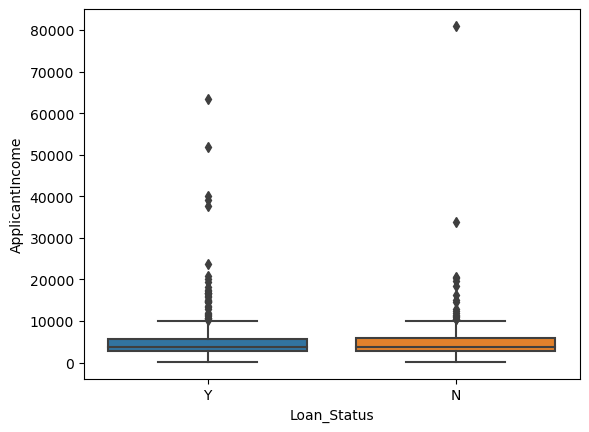

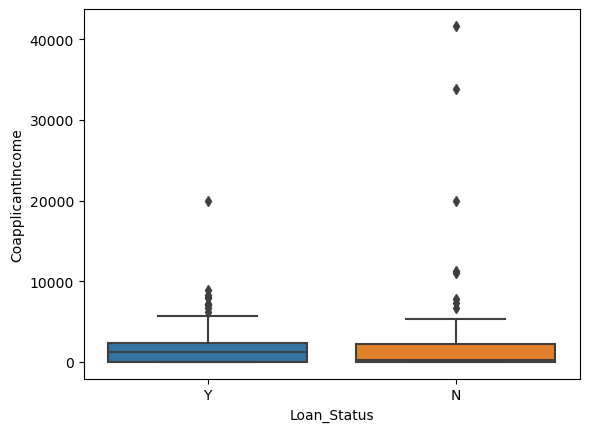

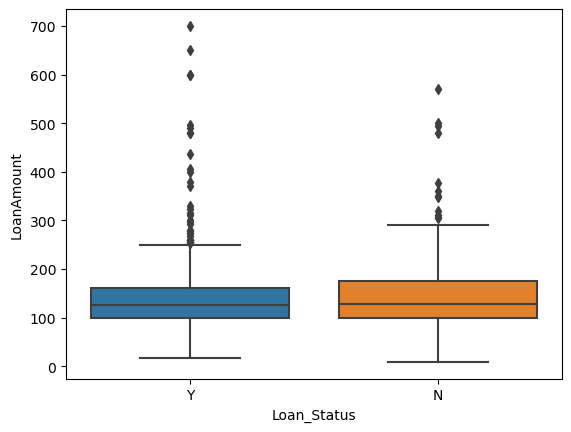

In [58]:
for c in con_col:
    sns.boxplot(x='Loan_Status',y = c,data=df)
    plt.show()

In [59]:
# Loan status in not changing with respect to Loan Amount, Applicant Income and COApplicant Income

### Categroical Vs Target (Categorical)

In [60]:
for c in cat_col:
    print(c,':')
    print(pd.crosstab(df[c],df['Loan_Status']))
    print('-'*50)

Credit_History :
Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378
--------------------------------------------------
Property_Area :
Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133
--------------------------------------------------
Married :
Loan_Status    N    Y
Married              
No            79  134
Yes          113  285
--------------------------------------------------
Loan_Status :
Loan_Status    N    Y
Loan_Status          
N            192    0
Y              0  422
--------------------------------------------------
Self_Employed :
Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56
--------------------------------------------------
Dependents :
Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33
--------------------------------------------

In [ ]:
# Since the ration of credit history  

# 12:1 ,1:4 there is clear difference the ratio.

# Credit history is the important factor

In [61]:
# Since the ratio of proerty area is different

# 7:10 ,3.3:10,5:10 there is clear difference the ratio.

#  Property Area is also the important factor

# Similary other columns can be improved.

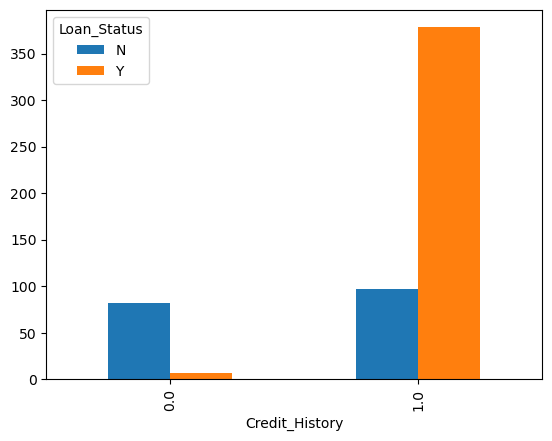

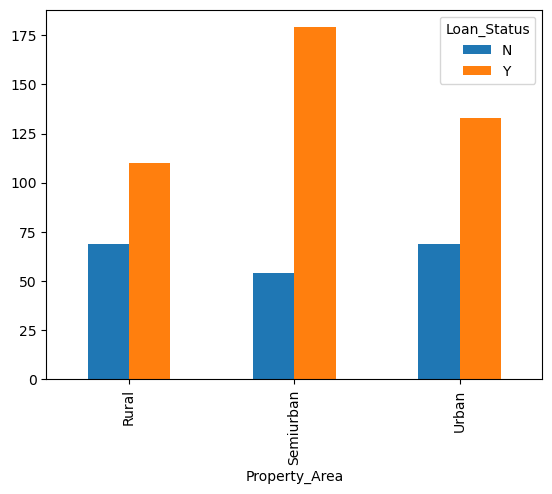

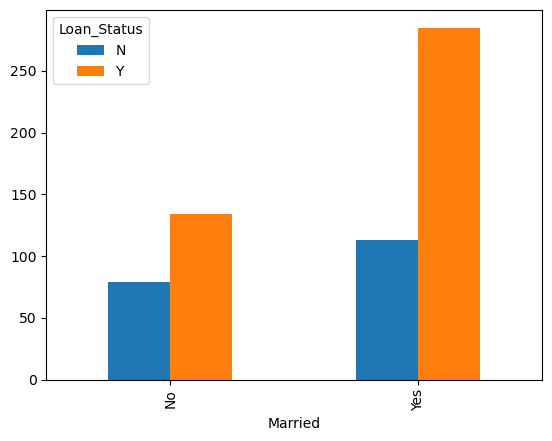

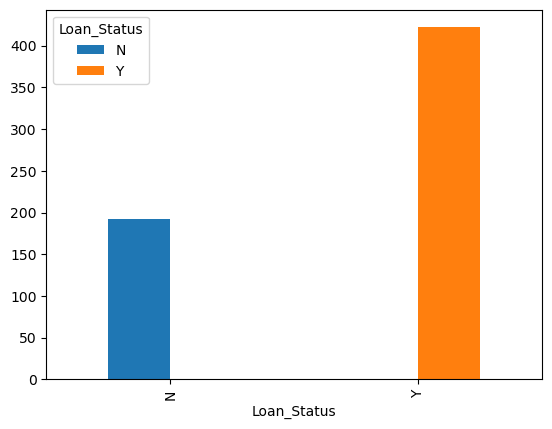

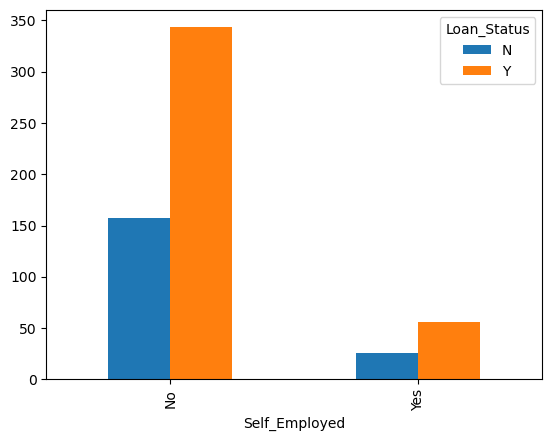

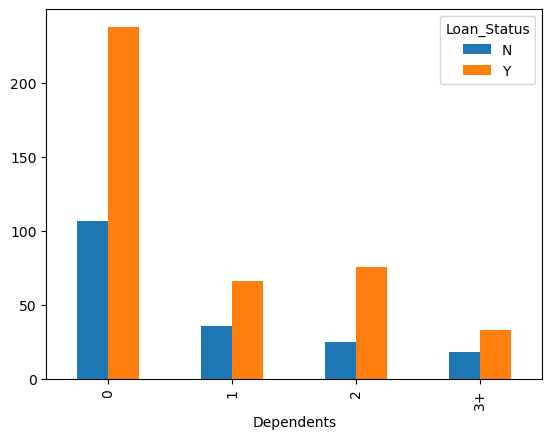

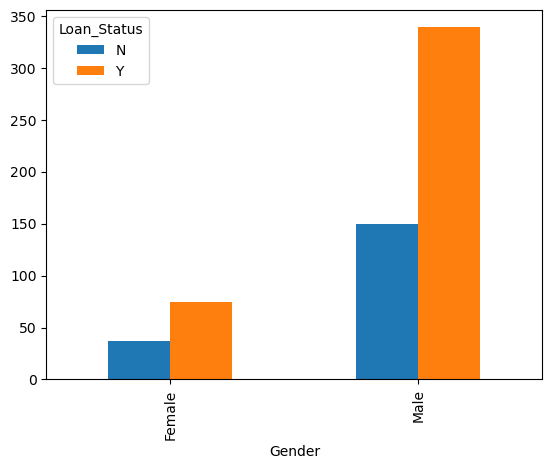

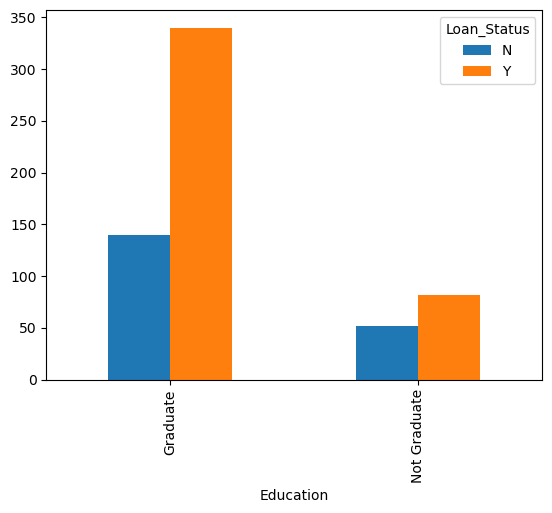

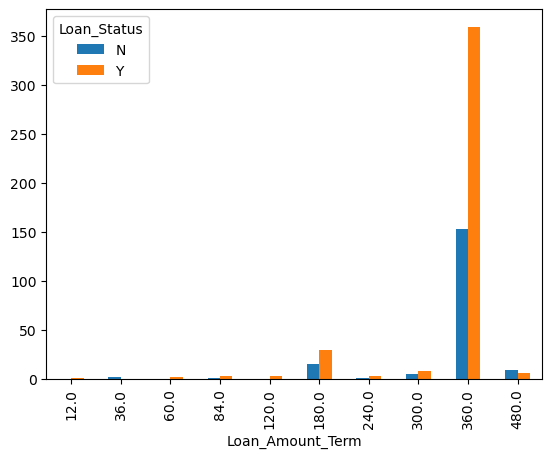

In [62]:
for c in cat_col:
    pd.crosstab(df[c],df['Loan_Status']).plot(kind='bar')
    plt.show()

## Other Analysis

In [63]:
# Continuous Vs Continuous

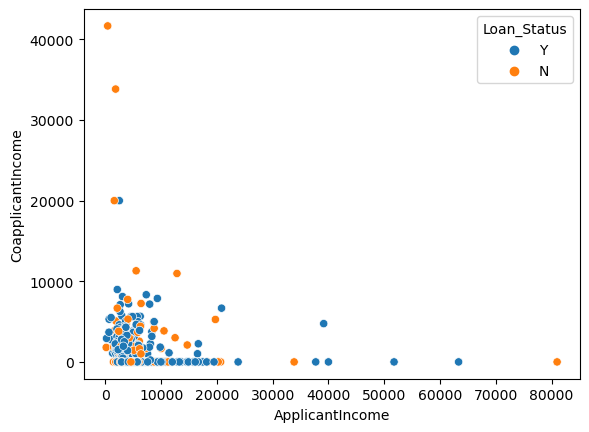

In [70]:
sns.scatterplot(x = 'ApplicantIncome',y ='CoapplicantIncome',data=df,hue='Loan_Status')
plt.show()

In [72]:
# Loan status is dependent on applicant income compared to co applicant income.
# Coapplicant income is not related to Applicant income.

# Correlation

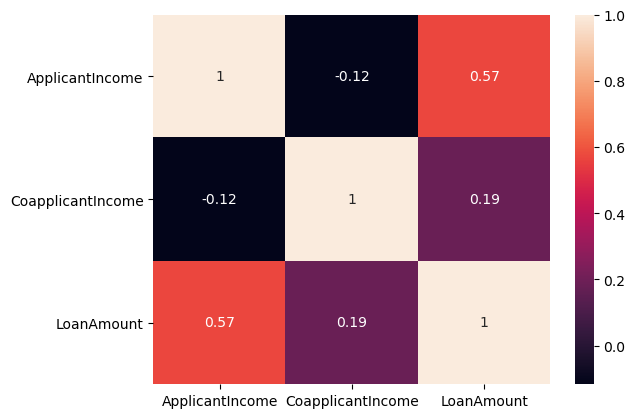

In [74]:
sns.heatmap(df[con_col].corr(),annot=True)
plt.show()

In [75]:
# Moderate correlation between loan amount and coapplicant income

# Null values 

In [77]:
df.isnull().sum()/len(df)*100

Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [ ]:
# All the columsn having less than 10%
# So single value imputation can be dome

In [80]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [81]:
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)

In [82]:
df.isnull().sum()/len(df)*100

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

# Outlier Analysis

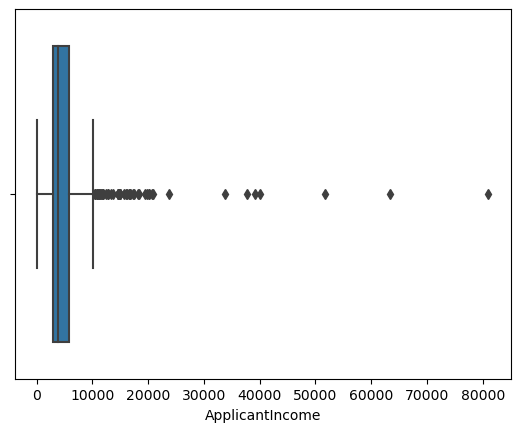

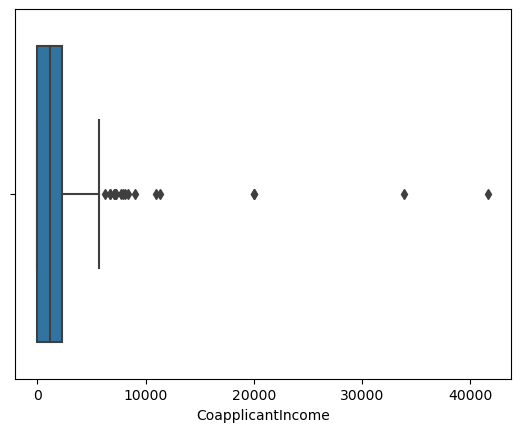

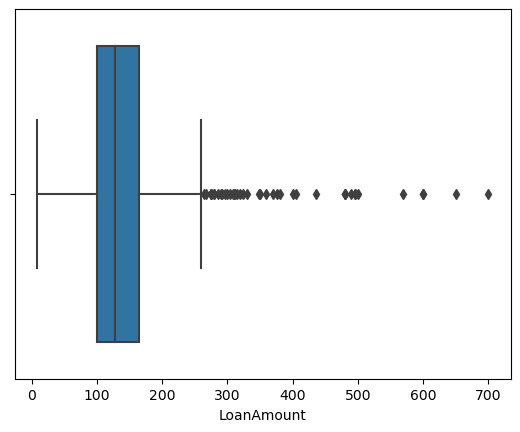

In [86]:
for c in con_col:
    sns.boxplot(x = df[c])
    plt.show()

In [87]:
# There are outliers in the data 
# Performing capping

In [88]:
for c in con_col:
    q3 = df[c].quantile(0.75)
    q1 = df[c].quantile(0.25)
    iqr = q3-q1
    ll = q1-(1.5*iqr)
    ul = q3+(1.5*iqr)
    for ind in df[c].index:
        if df.loc[ind,c]<ll:
             df.loc[ind,c]=ll
        if df.loc[ind,c]>ul:
             df.loc[ind,c]=ul

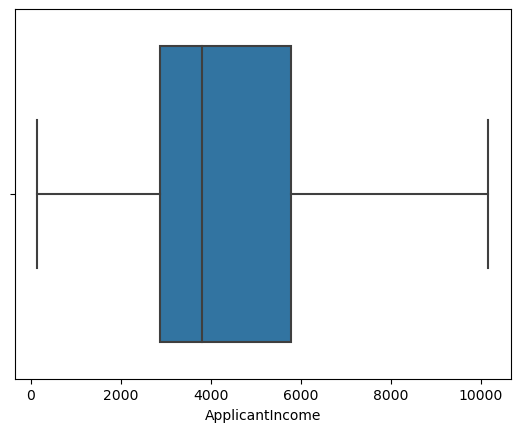

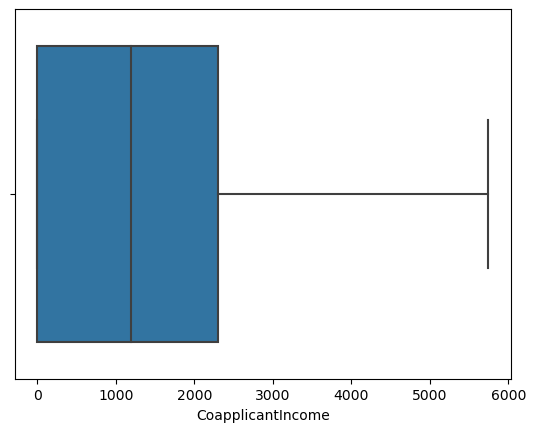

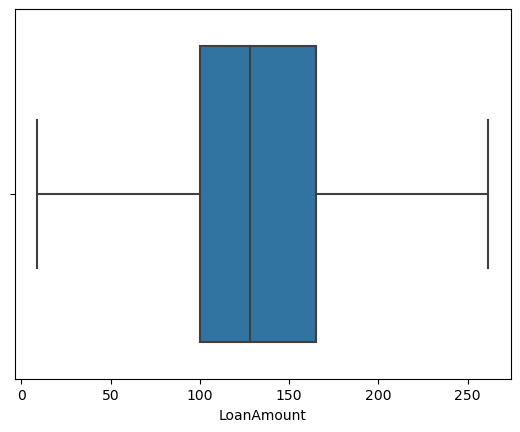

In [89]:
for c in con_col:
    sns.boxplot(x = df[c])
    plt.show()

In [ ]:
# After capping,ther is no outliers

In [ ]:
# Other Outlier techniques

# 1) Tranformations

# Feature Engineering

In [ ]:
# debt to income 

In [90]:
df['Total_Income'] = df['ApplicantIncome']+df['CoapplicantIncome']
df['Loan_to_Income'] = df['LoanAmount']/df['Total_Income']
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Loan_to_Income
0,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y,5849.0,0.021884
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N,6091.0,0.021015
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y,3000.0,0.022000
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,0.024287
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y,6000.0,0.023500


In [91]:
# Bucketing

In [93]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [94]:
def bucket_loanterm(months):
    if months<=60:
        return 'shortterm'
    elif months>60 and months<=180:
        return 'midterm'
    else:
        return 'longterm'

In [96]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].apply(bucket_loanterm)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Loan_to_Income
0,Male,No,0,Graduate,No,5849.0,0.0,128.0,longterm,1.0,Urban,Y,5849.0,0.021884
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,longterm,1.0,Rural,N,6091.0,0.021015
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,longterm,1.0,Urban,Y,3000.0,0.022000
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,longterm,1.0,Urban,Y,4941.0,0.024287
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,longterm,1.0,Urban,Y,6000.0,0.023500


In [97]:
con_col.extend(['Total_Income','Loan_to_Income'])

In [98]:
con_col

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Total_Income',
 'Loan_to_Income']

# Data Preparation

# Encoding

In [99]:
encoded = pd.get_dummies(df[cat_col],drop_first=True)
encoded.head()

,Credit_History,Property_Area_Semiurban,Property_Area_Urban,Married_Yes,Loan_Status_Y,Self_Employed_Yes,Dependents_1,Dependents_2,Dependents_3+,Gender_Male,Education_Not Graduate,Loan_Amount_Term_midterm,Loan_Amount_Term_shortterm
0,1.0,0,1,0,1,0,0,0,0,1,0,0,0
1,1.0,0,0,1,0,0,1,0,0,1,0,0,0
2,1.0,0,1,1,1,1,0,0,0,1,0,0,0
3,1.0,0,1,1,1,0,0,0,0,1,1,0,0
4,1.0,0,1,0,1,0,0,0,0,1,0,0,0


# Scaling 

In [100]:
from sklearn.preprocessing import StandardScaler

In [1]:
ss = StandardScaler()
scaled = pd.DataFrame(ss.fit_transform(df[con_col]),columns=con_col)
scaled

NameError: name 'StandardScaler' is not defined

## Final Data

In [105]:
pd.concat([encoded,scaled],axis=1)

,Credit_History,Property_Area_Semiurban,Property_Area_Urban,Married_Yes,Loan_Status_Y,Self_Employed_Yes,Dependents_1,Dependents_2,Dependents_3+,Gender_Male,Education_Not Graduate,Loan_Amount_Term_midterm,Loan_Amount_Term_shortterm,ApplicantIncome,CoapplicantIncome,LoanAmount,Total_Income,Loan_to_Income
0,1.0,0,1,0,1,0,0,0,0,1,0,0,0,0.497164,-0.874587,-0.168041,-0.071330,-0.281099
1,1.0,0,0,1,0,0,1,0,0,1,0,0,0,-0.013767,0.054395,-0.168041,0.020579,-0.387017
2,1.0,0,1,1,1,1,0,0,0,1,0,0,0,-0.652632,-0.874587,-1.280462,-1.153351,-0.266978
3,1.0,0,1,1,1,0,0,0,0,1,1,0,0,-0.820924,0.578025,-0.311579,-0.416179,0.011569
4,1.0,0,1,0,1,0,0,0,0,1,0,0,0,0.558104,-0.874587,0.065209,-0.013982,-0.084251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0,0,0,1,0,0,0,0,0,0,0,0,-0.692990,-0.874587,-1.190750,-1.191330,0.035467
610,1.0,0,0,1,1,0,0,0,1,1,0,1,0,-0.206274,-0.874587,-1.746961,-0.733304,-1.760246
611,1.0,0,1,1,1,0,1,0,0,1,0,0,0,1.394319,-0.726739,2.074743,0.864093,0.760915
612,1.0,0,1,1,1,0,0,1,0,1,0,0,0,1.196969,-0.874587,0.890553,0.587226,0.057110
